## Histograma de una imagen

/usr/local/lib/python3.9/site-packages/sos_notebook/kernel.py:1334: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  msg['msg_id'] = self._parent_header['header']['msg_id']


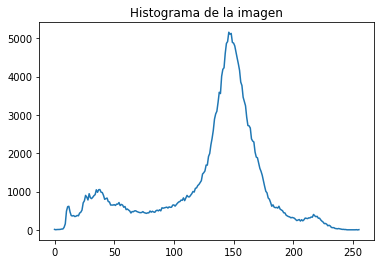

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(img_path):
    """
    Esta funcion calcula el histograma de una imagen

    Sintaxis: histograma(img_path)

    Entrada:
        img_path -> direccion de la imagen a calcular el histograma

    Salida:
        Array de tamaño de 256 con el histograma

    """
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    (height, width) = image.shape
    hist = np.zeros(256, np.uint32)
    for i in range(width):
        for j in range(height):
            hist[image[i, j]] += 1
    return hist


if __name__ == '__main__':
    r = histograma("../Imagenes/boat.jpg")
    fig = plt.subplots(1, 1)
    plt.plot(r)
    plt.title("Histograma de la imagen")
    plt.show()


## Ecualización del Histograma

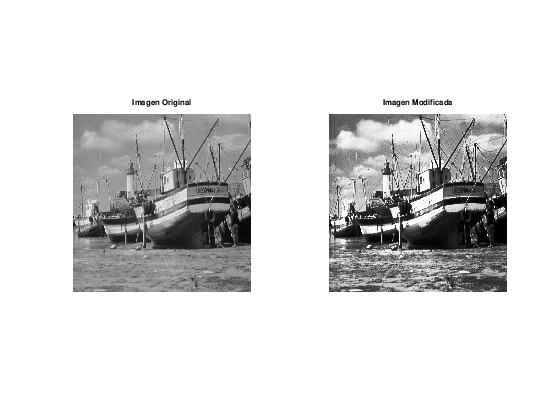

In [2]:
pkg load image
function imagenEcualizada = ecualizarImagen(img_path)
    %Esta funcion calcula una imagen ecualizada
    %
    %Sintaxis: ecualizarImagen(img_path)
    %
    %Entrada:
    %    img_path -> direccion de la imagen a ecualizar
    %
    %Salida:
    %    Imagen ecualizada del tamaño de la imagen original
    img = imread(img_path);
    hist = obtenerHistograma(img);
    [m, n] = size(img);
    dist_acu = distribucionAcumulativa(hist, m, n);
    
    imagenEcualizada = zeros(m, n);
    img_double = double(img);
    
    for x = 1:m
        for y = 1:n
            imagenEcualizada(x, y) = round(dist_acu(img_double(x , y) + 1) * 255);
        endfor
    endfor

    imagenEcualizada = uint8(imagenEcualizada);
    
    
endfunction

function histograma = obtenerHistograma(img)
    %Esta funcion calcula el histograma de una imagen
    %
    %Sintaxis: obtenerHistograma(img)
    %
    %Entrada:
    %    img -> Imagen a calcular el histograma
    %
    %Salida:
    %    Array de tamaño de 256 con el histograma
    
    histograma = zeros(256, 1);
    for i = 0:255
        histograma(i+1) = sum(sum(img == i));
    endfor
endfunction

function dist = distribucionAcumulativa(hist, m, n)
    %Esta funcion calcula la distribucion del histograma de una imagen
    %
    %Sintaxis: distribucionAcumulativa(hist, m, n)
    %
    %Entrada:
    %    hist -> direccion de la imagen a calcular el histograma
    %    m -> Entero, tamaño del ancho   
    %    n -> Entero, tamaño del alto
    %
    %Salida:
    %    Array de tamaño de 256 con la distribucion acumulada

    dist = zeros(256, 1);
    for i = 0: 255
        dist(i + 1) = sum(hist(1:i+1)/(m*n));
    endfor

endfunction

A = imread('../Imagenes/boat.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen Original');

img_final = ecualizarImagen('../Imagenes/boat.jpg');
subplot(1, 2, 2);
imshow(img_final);
title('Imagen Modificada');


## Estiramiento del Histograma

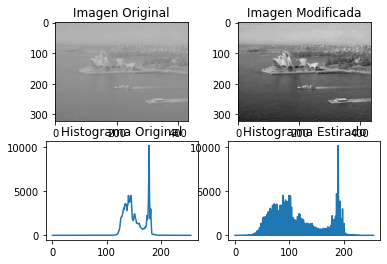

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(image):
    """
    Esta funcion calcula el histograma de una imagen

    Sintaxis: histograma(image)

    Entrada:
        img_path -> Imagen a calcular el histograma

    Salida:
        Array de tamaño de 256 con el histograma

    """
    (height, width) = image.shape
    hist = np.zeros(256, np.uint32)
    for i in range(width):
        for j in range(height):
            hist[image[j, i]] += 1
    return hist


def estirarHistograma(img_path):
    """
    Esta funcion calcula una imagen con el histograma estirado

    Sintaxis: estirarHistograma(img_path)

    Entrada:
        img_path -> direccion de la imagen a calcular el histograma

    Salida:
        Imagen del tamaño original con el histograma estirado
    """
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    rmin = np.min(image)
    rmax = np.max(image)

    result_image = (255 / (rmax - rmin)) * (image - rmin)
    result_image = result_image.astype(np.uint8)

    return (result_image, histograma(result_image))


if __name__ == '__main__':
    image_ori = cv2.imread("../Imagenes/sydney.jpeg", cv2.IMREAD_GRAYSCALE)

    (image_final, r) = estirarHistograma("../Imagenes/sydney.jpeg")

    fig, axs = plt.subplots(2, 2)

    axs[0, 0].imshow(image_ori, cmap='gray', vmin=0, vmax=255)
    axs[0, 0].set_title('Imagen Original')

    hist_ori = histograma(image_ori)
    axs[1, 0].plot(hist_ori)
    axs[1, 0].set_title('Histograma Original')

    axs[0, 1].imshow(image_final, cmap='gray', vmin=0, vmax=255)
    axs[0, 1].set_title('Imagen Modificada')

    axs[1, 1].plot(r)
    axs[1, 1].set_title('Histograma Estirado')

    plt.show()

## Reducción del Histograma

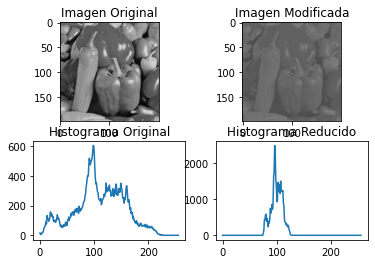

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def histograma(image):
    """
    Esta funcion calcula el histograma de una imagen

    Sintaxis: histograma(img_path)

    Entrada:
        img_path -> direccion de la imagen a calcular el histograma

    Salida:
        Array de tamaño de 256 con el histograma

    """
    (height, width) = image.shape
    hist = np.zeros(256, np.uint32)
    for i in range(width):
        for j in range(height):
            hist[image[j, i]] += 1
    return hist

def reducirHistograma(img_path, smin, smax):
    """
    Esta funcion calcula una imagen con el histograma reducido

    Sintaxis: reducirHistograma(img_path, smin, smax)

    Entrada:
        img_path -> direccion de la imagen a calcular el histograma
        smin -> valor minimo limite de la reduccion
        smax -> valor maximo limite de la reduccion

    Salida:
        Imagen del tamaño original con el histograma reducido

    """
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    image = image.astype(float)

    rmin = np.min(image)
    rmax = np.max(image)

    if not (rmin < smin < rmax) or not (rmin < smax < rmax):
        return ([], [])

    result_image = ((smax - smin)/(rmax - rmin)) * (image - rmin) + smin

    return (result_image, histograma(result_image.astype(int)))
if __name__ == '__main__':
    image = cv2.imread("../Imagenes/peppers.jpeg", cv2.IMREAD_GRAYSCALE)
    
    (image_final, r) = reducirHistograma("../Imagenes/peppers.jpeg", 75, 127)
    fig, axs = plt.subplots(2, 2)

    axs[0, 0].imshow(image, cmap='gray', vmin=0, vmax=255)
    axs[0, 0].set_title('Imagen Original')

    hist_ori = histograma(image)
    axs[1, 0].plot(hist_ori)
    axs[1, 0].set_title('Histograma Original')

    axs[0, 1].imshow(image_final, cmap='gray', vmin=0, vmax=255)
    axs[0, 1].set_title('Imagen Modificada')

    axs[1, 1].plot(r)
    axs[1, 1].set_title('Histograma Reducido')
    plt.show()

## Especificación del Histograma 

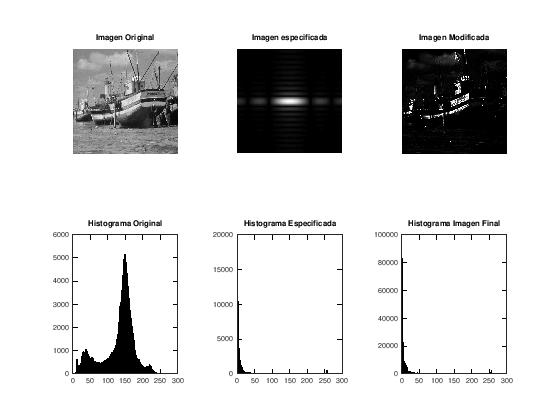

In [6]:
pkg load image

function imagenEspecificada = especificacionHistograma(img_path_origen, img_path_especificada)

    img = imread(img_path_origen);
    [img_m, img_n] = size(img);
    
    img_especificada = imread(img_path_especificada);
    [especificada_m, especificada_n] = size(img_especificada);

    hist_img = obtenerHistograma(img);
    hist_especificada = obtenerHistograma(img_especificada);

    acu_img = distribucionAcumulativa(hist_img, img_m, img_n);
    acu_espe = distribucionAcumulativa(hist_especificada, especificada_m, especificada_n);

    imagenEspecificada = zeros(img_m, img_n);
    img_double = double(img);

    mapeo = zeros(256);

    for i = 1:256
        [value, index] = min(abs(acu_espe - acu_img(i)));
        mapeo(i) = index;
    endfor
    for x = 1:img_m
        for y = 1:img_n         
            imagenEspecificada(x, y) = round(mapeo(img_double(x, y) + 1));
        endfor
    endfor
    imagenEspecificada = uint8(imagenEspecificada);
endfunction


function dist = distribucionAcumulativa(hist, m, n)

    dist = zeros(256, 1);
    for i = 0: 255
        dist(i + 1) = sum(hist(1:i+1)/(m*n));
    endfor

endfunction

function histograma = obtenerHistograma(img)
    histograma = zeros(256, 1);
    for i = 0:255
        histograma(i+1) = sum(sum(img == i));
    endfor
endfunction

A = imread('../Imagenes/boat.jpg');
subplot(2, 3, 1);
imshow(A);
title('Imagen Original');

especi = imread('../Imagenes/log.jpg');
subplot(2, 3, 2);
imshow(especi);
title('Imagen especificada');

img_final = especificacionHistograma('../Imagenes/boat.jpg', '../Imagenes/log.jpg');
subplot(2, 3, 3);
imshow(img_final);
title('Imagen Modificada');

hist_ori = obtenerHistograma(A);
subplot(2, 3, 4);
bar(hist_ori);
title('Histograma Original');

hist_especi = obtenerHistograma(especi);
subplot(2, 3, 5);
bar(hist_especi);
title('Histograma Especificada');

hist_final = obtenerHistograma(img_final);
subplot(2, 3, 6);
bar(hist_final);
title('Histograma Imagen Final');